Install Libraries: This block installs the necessary Python libraries: supervision, inference, and roboflow using pip. The -q flag suppresses the output of the installation process.

In [1]:
!pip install supervision inference roboflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 

Import Libraries: This block imports the required modules and classes from the installed libraries, such as get_model from inference, cv2 for image processing, supervision (aliased as sv), and Roboflow. It also imports os.

In [2]:
from inference import get_model
import cv2
import supervision as sv
from roboflow import Roboflow
import os

/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:340: ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:352: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:362: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:373: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-pack

Set Roboflow API Key: This block sets the ROBOFLOW_API_KEY environment variable using the provided API key. This is necessary to authenticate with the Roboflow service to access models.

In [3]:
os.environ["ROBOFLOW_API_KEY"] = ""

Image Inference and Annotation: This block performs object detection on a single image.

    It reads an image from the specified path using cv2.imread.
    It gets a pre-trained model from Roboflow using get_model.
    It runs the inference model on the image to get results.
    It converts the inference results into supervision.Detections format.
    It initializes BoxAnnotator and LabelAnnotator for drawing bounding boxes and labels.
    It annotates the image with the detected objects.
    It displays the annotated image using sv.plot_image.



Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
Specified provider 'OpenVINOExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
Specified provider 'CoreMLExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'


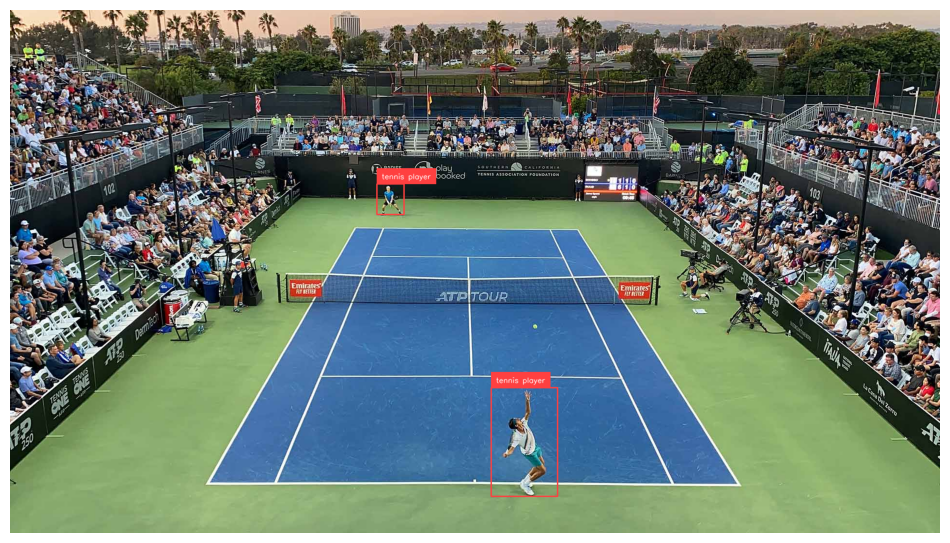

In [7]:
image = cv2.imread("/content/drive/MyDrive/youtube-videos/ML/supervision/tennis_ball_tracking/images/sandiego1.jpg")
model = get_model(model_id="tennistracker-95wb6/1",api_key=os.environ["ROBOFLOW_API_KEY"])
results = model.infer(image)[0]
detections = sv.Detections.from_inference(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(
    scene=image.copy(), detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

Video Inference and Tracking: This block performs object detection and tracking on a video.

    It gets video information from the specified video path using sv.VideoInfo.from_video_path.
    It creates a generator to yield frames from the video using sv.get_video_frames_generator.
    It gets the same pre-trained model from Roboflow as in the image block.
    It initializes a ByteTrack object for tracking and a DetectionsSmoother for smoothing the detection results.
    It initializes a BoxAnnotator for drawing bounding boxes.
    It uses sv.VideoSink to write the processed frames to a new video file named "out.mp4".
    It iterates through each frame of the video:
        It runs inference on the current frame.
        It converts the results to supervision.Detections.
        It updates the tracker with the new detections.
        It updates the smoother with the tracked detections.
        It annotates the frame with the tracked objects.
        It writes the annotated frame to the output video file.



In [8]:
video_info = sv.VideoInfo.from_video_path("/content/drive/MyDrive/youtube-videos/ML/supervision/tennis_ball_tracking/videos/tennis_demo.mp4")
frames_generator = sv.get_video_frames_generator("/content/drive/MyDrive/youtube-videos/ML/supervision/tennis_ball_tracking/videos/tennis_demo.mp4")

model = get_model(model_id="tennistracker-95wb6/1")
tracker = sv.ByteTrack()
smoother = sv.DetectionsSmoother()
box_annotator = sv.BoxAnnotator()

with sv.VideoSink(target_path="out.mp4", video_info=video_info) as sink:
    for frame in frames_generator:
        results = model.infer(frame)[0]
        detections = sv.Detections.from_inference(results)
        detections = tracker.update_with_detections(detections)
        detections = smoother.update_with_detections(detections)

        annotated_frame = box_annotator.annotate(
            frame.copy(), detections)

        sink.write_frame(frame=annotated_frame)